## First linear regresion fun

In [17]:
import numpy as np
X=np.random.rand(100,1)
y=4 + 3*X + np.random.randn(100,1)

In [19]:
X_b=np.c_[np.ones((100,1)), X]
print(X_b.shape)

(100, 2)


In [20]:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
y+4

array([[ 5.2831982 ],
       [ 4.83265464],
       [ 5.68135436],
       [ 4.65988579],
       [ 3.48870024],
       [ 3.8925327 ],
       [ 4.9749198 ],
       [ 3.69034393],
       [ 4.62475209],
       [ 2.18773982]])

In [21]:
print(theta_best)

[[ 4.10185596]
 [ 2.69615921]]


In [25]:
X_new=np.array([[0],[2]])

In [28]:
print(X_new)

[[0]
 [2]]


In [27]:
X_new_b=np.c_[np.ones((2,1)),X_new]

In [29]:
X_new_b

array([[ 1.,  0.],
       [ 1.,  2.]])

In [31]:
y_pred=X_new_b.dot(theta_best)

In [32]:
y_pred

array([[ 4.10185596],
       [ 9.49417439]])

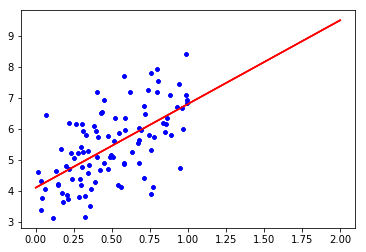

In [38]:
import matplotlib.pyplot as plt 
plt.plot(X,y,"b.")
plt.plot(X_new,y_pred,"r-")
plt.show()